# Metro Bike Share -- Regression Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning and Hypothesis
#### 3. Data prep
#### 4. Regression analysis and Model fitness assessment
#### 5. Conclusion

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path= r'C:\Users\ashan\OneDrive\桌面\Data Analytic\Metro Bike Share'

In [4]:
# Data about Metro Bike Share trips during 2023 ( Source: Metro Bike Share Official Website )

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_2023.csv'), index_col = 0)

In [12]:
# Data about daylight in Los Angeles during 2023 ( Source: Griffith Observatory official Website)

daylight = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Daylight_2023-SZ.csv'), encoding='latin-1')

### 2. Data cleaning and Hypothesis

In [13]:
daylight.head()

,Date,Day,Begin Civil Twilight,Rise Az.,°,Transit Alt.,°.1,Set Az.,°.2,End Civil Twilight,daylight duration
0,1/1/2023,(Sun),6:31,6:59,118,11:57,33S,16:55,243,17:22,10.85
1,1/2/2023,(Mon),6:31,6:59,117,11:57,33S,16:56,243,17:23,10.87
2,1/3/2023,(Tue),6:32,6:59,117,11:58,33S,16:56,243,17:24,10.87
3,1/4/2023,(Wed),6:32,6:59,117,11:58,33S,16:57,243,17:25,10.88
4,1/5/2023,(Thu),6:32,6:59,117,11:59,33S,16:58,243,17:25,10.88


In [14]:
daylight.columns

Index(['Date', 'Day', 'Begin Civil Twilight', 'Rise Az.', '°', 'Transit Alt.',
       '°.1', 'Set Az.', '°.2', 'End Civil Twilight', 'daylight duration'],
      dtype='object')

In [15]:
daylight.shape

(365, 11)

In [9]:
df.head()

,trip_id,duration,fare_without_discount,start_time,month,day_of_month,time_of_start,day_of_week,end_time,start_station,...,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,fare,subscription
0,231787362,9,1.75,1/1/2023 0:41,1,1,0,1,1/1/2023 0:50,4204,...,4210,33.984341,-118.471550,23373,30,One Way,Monthly Pass,electric,0.00,17
1,231801471,97,7.00,1/1/2023 1:05,1,1,1,1,1/1/2023 2:42,3054,...,3054,34.039219,-118.236488,13870,1,Round Trip,Walk-up,standard,7.00,0
2,231794062,15,1.75,1/1/2023 1:11,1,1,1,1,1/1/2023 1:26,3037,...,3068,34.053200,-118.250954,23942,1,One Way,Walk-up,electric,2.75,0
3,231794664,26,1.75,1/1/2023 1:31,1,1,1,1,1/1/2023 1:57,3063,...,4454,34.017899,-118.291718,22873,1,One Way,Walk-up,electric,2.75,0
4,231794562,8,1.75,1/1/2023 1:44,1,1,1,1,1/1/2023 1:52,3066,...,3026,34.063179,-118.245880,14790,1,One Way,Walk-up,standard,1.75,0


In [10]:
df.columns

Index(['trip_id', 'duration', 'fare_without_discount', 'start_time', 'month',
       'day_of_month', 'time_of_start', 'day_of_week', 'end_time',
       'start_station', 'start_lat', 'start_lon', 'end_station', 'end_lat',
       'end_lon', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'bike_type', 'fare', 'subscription'],
      dtype='object')

In [11]:
df.shape

(433658, 22)

### Hypothesis:

# The longer the daylight hour, the more count of bike trip.

###### Data Wrangling

In [16]:
# Convert column data type to datetime 
daylight['Date'] = pd.to_datetime(daylight['Date'])

In [26]:
daylight['Date'].dtypes

dtype('<M8[ns]')

In [19]:
daylight_2 = daylight[['Date','daylight duration']]

In [43]:
daylight_2.head()

,Date,daylight duration
0,2023-01-01,10.85
1,2023-01-02,10.87
2,2023-01-03,10.87
3,2023-01-04,10.88
4,2023-01-05,10.88


In [32]:
# Convert 'start_time' to datetime
df['start_time'] = pd.to_datetime(df['start_time'], format='%m/%d/%Y %H:%M')

In [33]:
# Extract date (year, month, day) and eliminate the time
df['Date'] = df['start_time'].dt.date

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
df['Date'].dtypes

dtype('<M8[ns]')

In [37]:
df_2 = df[['trip_id','Date']]

In [39]:
df_2.head()

,trip_id,Date
0,231787362,2023-01-01
1,231801471,2023-01-01
2,231794062,2023-01-01
3,231794664,2023-01-01
4,231794562,2023-01-01


In [40]:
# Group by 'Date' and count the number of 'trip_id' for each date
trip_counts = df.groupby('Date').size().reset_index(name='trip_count')

In [42]:
trip_counts.head()

,Date,trip_count
0,2023-01-01,630
1,2023-01-02,477
2,2023-01-03,572
3,2023-01-04,299
4,2023-01-05,475


In [44]:
df_merged = daylight_2.merge(trip_counts, on = 'Date', how = 'outer', indicator = True)

In [45]:
df_merged.head()

,Date,daylight duration,trip_count,_merge
0,2023-01-01,10.85,630,both
1,2023-01-02,10.87,477,both
2,2023-01-03,10.87,572,both
3,2023-01-04,10.88,299,both
4,2023-01-05,10.88,475,both


In [48]:
# Subset useful columns
data_to_rege = df_merged[['daylight duration','trip_count']]

In [49]:
data_to_rege.head()

,daylight duration,trip_count
0,10.85,630
1,10.87,477
2,10.87,572
3,10.88,299
4,10.88,475


###### Data Cleaning

In [50]:
# Check for missing values

data_to_rege.isnull().sum()

# No missing values to handle

daylight duration    0
trip_count           0
dtype: int64

In [51]:
# Check duplicates
dups = data_to_rege.duplicated()

In [52]:
dups.shape # No duplicates

(365,)

##### Data Exploring 

C:\Users\ashan\AppData\Local\Temp\ipykernel_25320\367568831.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_to_rege['daylight duration'], bins=25)
C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='daylight duration', ylabel='Density'>

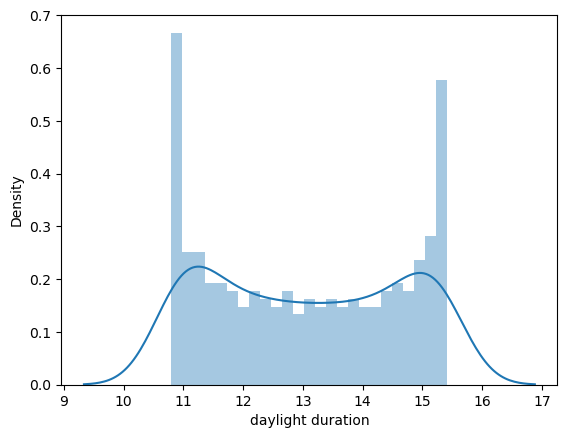

In [54]:
# Extreme value
sns.distplot(data_to_rege['daylight duration'], bins=25)

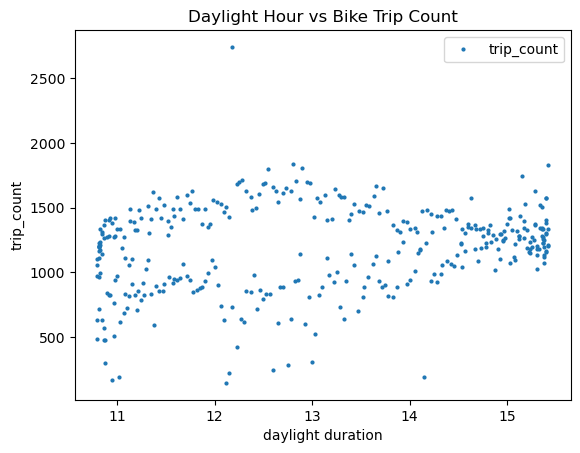

In [56]:
# Explore relatioship between average trip duration and daylihgt hour.

data_to_rege.plot(x = 'daylight duration', y='trip_count',style='o', markersize = 2) 
plt.title('Daylight Hour vs Bike Trip Count')  
plt.xlabel('daylight duration')  
plt.ylabel('trip_count')  
plt.show()

### 3. Data prep fro Regression Analysis

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = data_to_rege['daylight duration'].values.reshape(-1,1)
y = data_to_rege['trip_count'].values.reshape(-1,1)

In [58]:
X

array([[10.85],
       [10.87],
       [10.87],
       [10.88],
       [10.88],
       [10.9 ],
       [10.92],
       [10.93],
       [10.95],
       [10.97],
       [10.97],
       [10.98],
       [11.  ],
       [11.02],
       [11.03],
       [11.07],
       [11.08],
       [11.1 ],
       [11.12],
       [11.15],
       [11.15],
       [11.18],
       [11.2 ],
       [11.22],
       [11.25],
       [11.27],
       [11.3 ],
       [11.32],
       [11.35],
       [11.38],
       [11.4 ],
       [11.43],
       [11.47],
       [11.48],
       [11.52],
       [11.53],
       [11.57],
       [11.58],
       [11.62],
       [11.65],
       [11.68],
       [11.72],
       [11.75],
       [11.78],
       [11.82],
       [11.85],
       [11.87],
       [11.9 ],
       [11.93],
       [11.97],
       [12.  ],
       [12.03],
       [12.07],
       [12.1 ],
       [12.12],
       [12.15],
       [12.18],
       [12.23],
       [12.27],
       [12.3 ],
       [12.32],
       [12.37],
       [

In [59]:
y

array([[ 630],
       [ 477],
       [ 572],
       [ 299],
       [ 475],
       [ 842],
       [ 827],
       [ 828],
       [ 166],
       [ 510],
       [ 766],
       [ 944],
       [ 975],
       [ 196],
       [ 615],
       [ 684],
       [ 835],
       [ 729],
       [ 818],
       [ 913],
       [1104],
       [ 824],
       [ 711],
       [ 858],
       [ 786],
       [ 915],
       [1026],
       [1095],
       [ 833],
       [ 595],
       [ 899],
       [ 858],
       [ 854],
       [ 912],
       [1288],
       [ 964],
       [ 915],
       [ 948],
       [ 940],
       [ 957],
       [1065],
       [ 973],
       [ 939],
       [ 851],
       [ 861],
       [ 877],
       [ 887],
       [ 934],
       [ 992],
       [1093],
       [1041],
       [ 906],
       [ 738],
       [ 634],
       [ 147],
       [ 223],
       [ 732],
       [ 423],
       [ 640],
       [ 618],
       [ 860],
       [ 849],
       [ 979],
       [ 721],
       [ 863],
       [ 798],
       [ 8

In [60]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis and Model fitness assessment

In [61]:
# Create a regression object.

regression = LinearRegression()

In [62]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [63]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

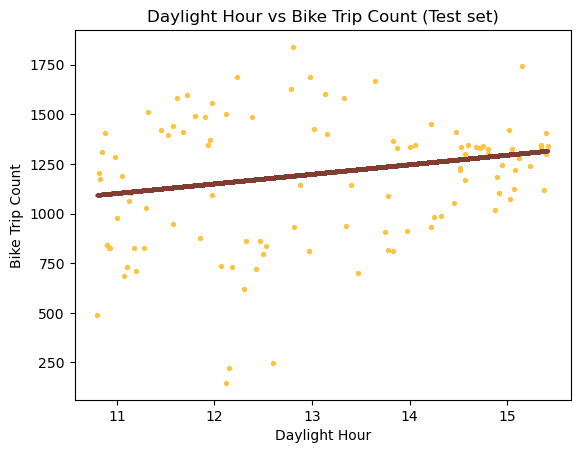

In [64]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='#FDC441', s = 8)
plot_test.plot(X_test, y_predicted, color='#823D32', linewidth =3)
plot_test.title('Daylight Hour vs Bike Trip Count (Test set)')
plot_test.xlabel('Daylight Hour')
plot_test.ylabel('Bike Trip Count')
plot_test.show()

In [65]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # Mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [66]:
# Print the model summary statistics to evaluate the performance

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[48.20515352]]
Mean squared error:  100219.4285080128
R2 score:  0.0430391210895934


In [67]:
y_predicted

array([[1243.91614185],
       [1204.38791596],
       [1141.72121639],
       [1115.20838195],
       [1195.71098833],
       [1092.5519598 ],
       [1216.43920434],
       [1122.43915498],
       [1239.0956265 ],
       [1096.89042362],
       [1267.05461554],
       [1295.01360458],
       [1198.121246  ],
       [1160.03917473],
       [1139.31095871],
       [1283.92641927],
       [1146.54173174],
       [1234.75716268],
       [1268.01871861],
       [1294.53155304],
       [1296.94181072],
       [1297.42386225],
       [1163.41353547],
       [1147.98788635],
       [1135.45454643],
       [1213.0648436 ],
       [1177.87508153],
       [1099.78273283],
       [1255.96743023],
       [1304.65463528],
       [1272.83923396],
       [1237.16742036],
       [1104.12119664],
       [1128.70582494],
       [1154.73660784],
       [1095.92632054],
       [1164.37763854],
       [1283.92641927],
       [1196.19303986],
       [1171.60841157],
       [1289.71103769],
       [1133.526

In [68]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,910,1243.916142
1,1403,1204.387916
2,877,1141.721216
3,1026,1115.208382
4,809,1195.710988
5,1175,1092.551960
6,1143,1216.439204
7,1422,1122.439155
8,1330,1239.095626
9,827,1096.890424


### 5. Conclusion

#### According the regression model summary statistics, the regression model performed poorly to predict the bike trip cout by the hour of daylight.

Regression model summary statistics:
* Slope: [[48.20515352]]
* Mean squared error:  100219.4285080128
* R2 score:  0.0430391210895934

From the statistics, the slope is 48.21. It means that the daylight hour does show a positive relation with the duration of bike trip. When the daylight hour increases, the duration of trip is expected to increase 48.21 unit. However, the mean squared error is 100219. It means the average squared difference is 100219 between the predicted values and the actual values. 100219 is way large here that the predicted data are highly inaccurate from the actual data. Lastly, the R2 is close to 0. It means there is no linear relationship between the daylight hour and bike trip count. Thus, the length of daylight hour can not used to predict the count of bike trips.

In the visualization, we can observe two distinct clusters around 11 and 15 daylight hours. Between 11 and 12 daylight hours, the data points are concentrated between 800 and 1500 trips, with a moderate level of dispersion. In contrast, when the daylight hours are between 12 and 14, the trip counts are more widely spread out, with very few data points around 1300 trips.